# **Lifecycle of a Data Science**

1. Feature Engineering

2. Feature Selection

3. Model Creation

4. Hyperparameter Tuning

5. Model Deployment


# **STEPS INCLUDED IN FEATURE ENGINEERING**
 
Step 1 : EDA(Exploratory Data Analysis)----> (plotting graph , describe , info , correlation matrix)
 
Step 2 : Handling missing values
 
Step 3 : Handling imbalanced dataset
 
Step 4 : Treating outliers
 
Step 5 : Scaling
 
Step 6 : Converting categorical into numerical


# EDA (by Seaborn )

# **Distribution plots**
1. Dist plot
2. join plot
3. Pair plot


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Create a DataFrame of 100 rows and 4 columns A , B, C and D with random data
df=pd.DataFrame({"A":list(np.linspace(1,1000,100)),"B":list(np.random.rand(100)),"C":np.random.randint(1, 1000 ,size=(100)) })
df["D"]=np.where(df['C']>500, 'C1', 'C2')
df.head()

,A,B,C,D
0,1.000000,0.573417,538,C1
1,11.090909,0.652802,747,C1
2,21.181818,0.090058,541,C1
3,31.272727,0.649120,407,C2
4,41.363636,0.919004,532,C1


In [ ]:
df.shape

(100, 4)

In [ ]:
import seaborn as sns

1**. Heatmap (To check the correlation between the features)**

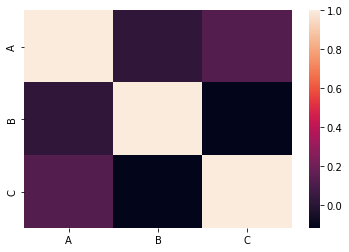

In [ ]:
sns.heatmap(df.corr())

 **2. Join plot**


In [1]:
sns.jointplot(data=df,x="A",y="B",hue="D")


NameError: ignored

**3. Pair plot**

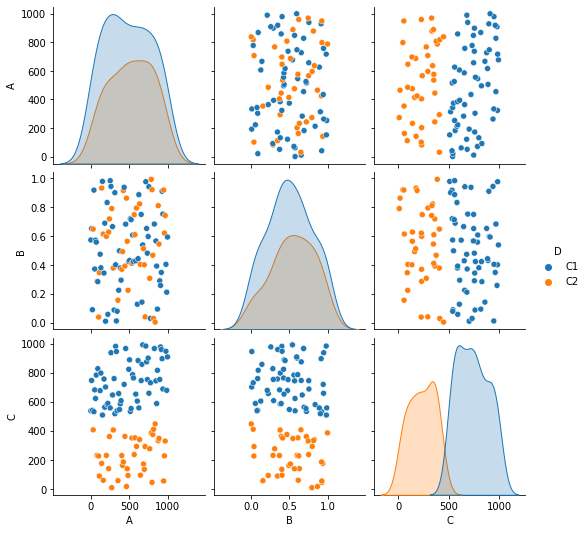

In [ ]:
sns.pairplot(df, hue="D")

**4. Dist plot**

A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin.

Larger the bins' value the more accurate the result.

KDE is a way to estimate the probability density function of a continuous random variable. It is used when you need to know the distribution of the variable.

**Note** :- We can use distplot to plot density function as well as histogram.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


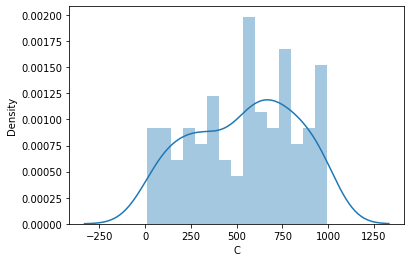

In [ ]:
sns.distplot(df["C"],bins=15)


# Seaborn also helps us in doing the analysis on Categorical Data points. In this section we will discuss about
1. boxplot
2. violinplot
3. countplot
4. bar plot


**1. Count plot**

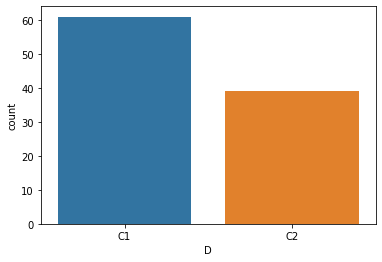

In [ ]:
sns.countplot(x="D", data=df)


**2. Box plot**

A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.

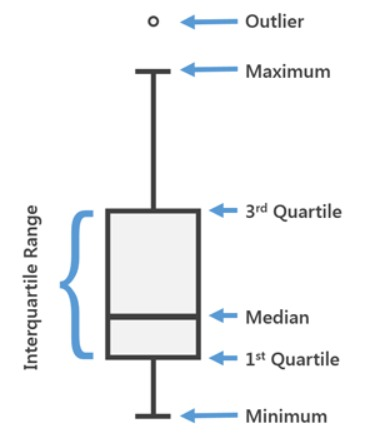

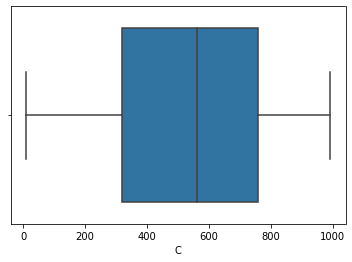

In [ ]:
sns.boxplot(x=df["C"] )


**3. Bar plot**


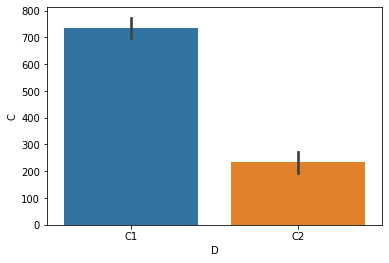

In [ ]:
sns.barplot(x="D", y="C", data=df)

**4. Violin Plot**


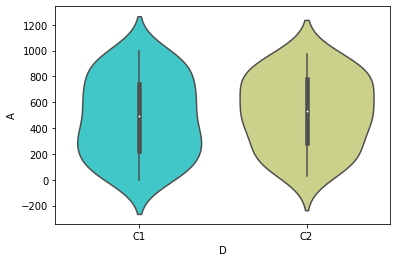

In [ ]:
sns.violinplot(x="D", y="A", data=df,palette='rainbow')


# **Checking multicollinearity**

Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model.

**Removal of multicollinearity**

1. Using Correlation matrix

2. Using VIF method


**Using Correlation Matrix**

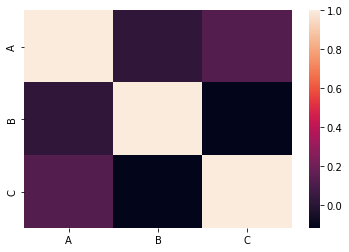

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Correlation function
 
def correlation(dataset, threshold): 
  col_corr = set() # Set of all the names of correlated columns §
  corr_matrix = dataset.corr() 
  for i in range(len(corr_matrix.columns)): 
    for j in range(i): 
      if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value |
        colname = corr_matrix.columns[i] # getting the name of column \
        col_corr.add(colname) 
        
  return col_corr


In [ ]:
correlation(df,0.8)

set()

It has returned a empty set since there is no correlation present. Value of threshold depends on the problem statement 











**Checking VIF**

Multicollinearity can be detected via various methods.
The most common one – VIF (Variable Inflation Factors).
VIF score of an independent variable represents how well the variable is explained by other independent variables.
VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

Lets define a function vif_scores that takes a dataframe with relevant input features and returns a dataframe with two columns
1. variables which has feature name
2. VIF which has vif score for corresponding feature


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df.iloc[:,:-1]) #To calculate the VIF score of Categorical variables , First we need to process One Hot encoding on it.

,variables,VIF
0,A,3.297436
1,B,2.812879
2,C,3.146303


# **Techniques to handle missing values**


Data Collection Strategy---Dataset should be collected from multiple sources

Data generally collected from company side,3rd party APi's,Surveys

Feature Engineering's one of the most important aspect---Handling Missing Values

Why are there Missing values?

1. Survey--Depression Survey
2. They hesitate to put down the information
    Men--salary
    Women---age
3. Survey informations are not that valid

4. People may have died----NAN



**What are the different types of Missing Data?**


1. Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

    Ex :    If people were randomly asked 10 of 15 questions in a questionnaire

2. Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. 

3. Missing At Random(MAR)
    
    Ex :
    Men---hide their salary
    Women---hide their age

***If a column is having more than 60% of nan values then its better to remove such variables altogether if business permits ***

In [ ]:
data2=pd.DataFrame({"A":[1,2,4,6,np.nan,7,3,np.nan,6,33],"B":[0.1,7,0.5,np.nan,7.8,6.6,np.nan,0.8,np.nan,0.22]})
data2

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,NaN
4,NaN,7.80
5,7.0,6.60
6,3.0,NaN
7,NaN,0.80
8,6.0,NaN
9,33.0,0.22


In [ ]:
data2.isnull().sum() #----> To check number of nan values in each column

A    2
B    3
dtype: int64

In [ ]:
data2.isna().any() #----> To check coloumns with nan values

A    True
B    True
dtype: bool

***Method -I ***

Filling with arbitary values

In [ ]:
data=data2.fillna({"A" : 0 , "B": 1})
data

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,1.00
4,0.0,7.80
5,7.0,6.60
6,3.0,1.00
7,0.0,0.80
8,6.0,1.00
9,33.0,0.22


**Advantages**


Easy to implement
Captures the importance of missingness if there is one

**Disadvantages**

Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use


**Method -II**

1. ffill
2. bfill
3. interpolate

In [ ]:
# ffill
data=data2.fillna(method="ffill") #---->fill nan values with the value from just previous row
data

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,0.50
4,6.0,7.80
5,7.0,6.60
6,3.0,6.60
7,3.0,0.80
8,6.0,0.80
9,33.0,0.22


In [ ]:
# bfill
data=data2.fillna(method="bfill") #---->fill nan values with the value from just next row
data

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,7.80
4,7.0,7.80
5,7.0,6.60
6,3.0,0.80
7,6.0,0.80
8,6.0,0.22
9,33.0,0.22


In [ ]:
# ffill
data=data2.interpolate() #---->fill nan values with the average of value from just previous and next rows
data

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,4.15
4,6.5,7.80
5,7.0,6.60
6,3.0,3.70
7,4.5,0.80
8,6.0,0.51
9,33.0,0.22


**3. KNN**

K-Nearest Neighbors imputation method   ---- A method to deal with missing values in pandas data frame. 


This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.

**Note** : Encoding and Scaling is must for this


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
ans=scaling.fit_transform(data2)
ans=pd.DataFrame(ans)


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(data2),columns =data2.columns)  #---> Replaces the nan values with the average of 3 nearest integer to that particular nan value
df

,A,B
0,1.000000,0.100000
1,2.000000,7.000000
2,4.000000,0.500000
3,6.000000,4.700000
4,4.333333,7.800000
5,7.000000,6.600000
6,3.000000,2.533333
7,12.666667,0.800000
8,6.000000,4.700000
9,33.000000,0.220000


In [ ]:
data3=data2.copy()
data4=data2.copy()
data5=data2.copy()
data6=data2.copy()
data3

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,NaN
4,NaN,7.80
5,7.0,6.60
6,3.0,NaN
7,NaN,0.80
8,6.0,NaN
9,33.0,0.22


**4. With Mean, Median Mode**

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurrence of the variables

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [ ]:
median_A=data2.A.median()
median_B=data2.B.median()
impute_nan(data2,'A',median_A)
impute_nan(data2,'B',median_B)

In [ ]:
data2

,A,B,A_median,B_median
0,1.0,0.10,1.0,0.10
1,2.0,7.00,2.0,7.00
2,4.0,0.50,4.0,0.50
3,6.0,NaN,6.0,0.80
4,NaN,7.80,5.0,7.80
5,7.0,6.60,7.0,6.60
6,3.0,NaN,3.0,0.80
7,NaN,0.80,5.0,0.80
8,6.0,NaN,6.0,0.80
9,33.0,0.22,33.0,0.22


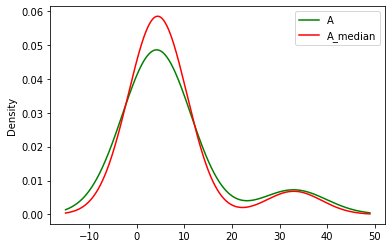

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
data2['A'].plot(kind='kde', ax=ax,color='green')#   —------------- > To plot the density distribution
data2.A_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Advantages And Disadvantages of Mean/Median Imputation

Advantages

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 

Disadvantages

1. Change or Distortion in the original variance
2. Impacts Correlation
 
Note : Categorical values are generally imputed with the mode as it represents the value that is the most common for the given column.


**5. Random Sample Imputation**

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

When should it be used? It assumes that the data are missing completely at random(MCAR)


In [ ]:
data2['A'].dropna().sample(data2['A'].isnull().sum(),random_state=10) #—---> It will generate as many of random values as required in that particular column (From the available data itself)


2    4.0
3    6.0
Name: A, dtype: float64

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [ ]:
median_A=df.A.median()
median_B=df.B.median()
impute_nan(data3,"A",median_A)
impute_nan(data3,"B",median_B)

In [ ]:
data3

,A,B,A_median,A_random,B_median,B_random
0,1.0,0.10,1.000000,1.0,0.100000,0.10
1,2.0,7.00,2.000000,2.0,7.000000,7.00
2,4.0,0.50,4.000000,4.0,0.500000,0.50
3,6.0,NaN,6.000000,6.0,3.616667,0.22
4,NaN,7.80,5.166667,6.0,7.800000,7.80
5,7.0,6.60,7.000000,7.0,6.600000,6.60
6,3.0,NaN,3.000000,3.0,3.616667,0.50
7,NaN,0.80,5.166667,4.0,0.800000,0.80
8,6.0,NaN,6.000000,6.0,3.616667,7.00
9,33.0,0.22,33.000000,33.0,0.220000,0.22


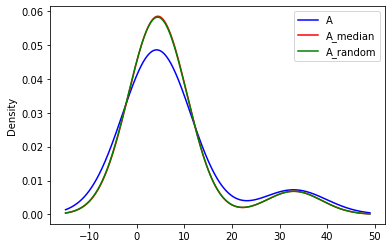

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
data3['A'].plot(kind='kde', ax=ax,color="blue") 
data3.A_median.plot(kind='kde', ax=ax, color='red')
data3.A_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


**Advantages**

Easy To implement.
There is less distortion in variance.

**Disadvantage**

Every situation randomness wont work.


**6. Capturing NAN values with a new feature (MAR)**


In [ ]:
import numpy as np
data4['A_NAN']=np.where(data4['A'].isnull(),1,0)
data4['A'].fillna(data4.A.median(),inplace=True)
data4

,A,B,A_NAN
0,1.0,0.10,0
1,2.0,7.00,0
2,4.0,0.50,0
3,6.0,NaN,0
4,5.0,7.80,1
5,7.0,6.60,0
6,3.0,NaN,0
7,5.0,0.80,1
8,6.0,NaN,0
9,33.0,0.22,0


Advantages


Easy to implement
Captures the importance of missing values


Disadvantages

Creating Additional Features(Curse of Dimensionality)


**7. End of Distribution imputation  —> It replace Nan with a random extreme value  (MAR)**


38.99899998399949

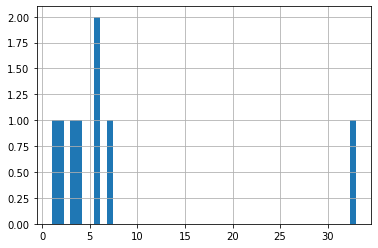

In [ ]:
data5.A.hist(bins=50)
extreme=data5.A.mean()+3*data5.A.std()
extreme

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


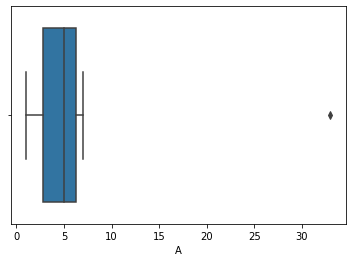

In [ ]:
import seaborn as sns
sns.boxplot('A',data=data5)

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


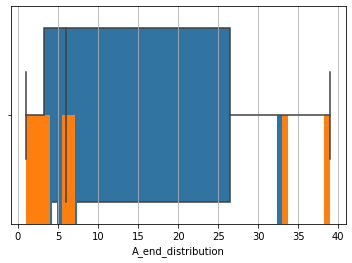

In [ ]:
impute_nan(data5,'A',data5.A.median(),extreme)
 
data5['A'].hist(bins=50)
 
data5['A_end_distribution'].hist(bins=50)
 
sns.boxplot('A_end_distribution',data=data5)

**Advantages**


Easy to implement
Captures the importance of missingness if there is one

**Disadvantages**


Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution.

If the number of NA is big, it will mask true outliers in the distribution

If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequence feature engineering.


# **Handling Categorical Missing Values**

**1. Frequent Category Imputation  (If percentage of missing values is less)**

Compute the frequency with every feature

In [ ]:
df=pd.DataFrame({"A" : ["p","q",np.nan,"p","p"],"B" : ["r",np.nan,np.nan,"s","r"]})
df1=df.copy()
df1

,A,B
0,p,r
1,q,NaN
2,NaN,NaN
3,p,s
4,p,r


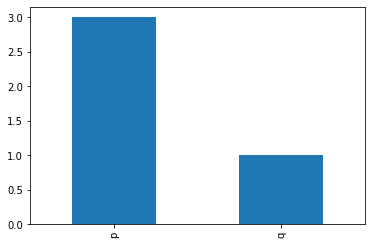

In [ ]:
df1['A'].value_counts().plot.bar()

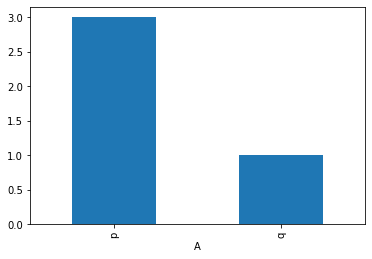

In [ ]:
df1.groupby(['A'])['A'].count().sort_values(ascending=False).plot.bar()


In [ ]:
df1['A'].value_counts().index[0]   # Return the most frequent category

'p'

In [ ]:
df1['A'].mode()[0] # Return the most frequent category

'p'

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)


In [ ]:
for feature in ['A','B']:
    impute_nan(df1,feature)


In [ ]:
df1

,A,B
0,p,r
1,q,r
2,p,r
3,p,s
4,p,r


**Advantages**


Easy To implement
Faster way to implement 

**Disadvantages**


Since we are using the more frequent labels, it may use them in an over represented way, if there are many nan's

It distorts the relation of the most frequent label


**2. Adding a variable to capture NAN**

In [ ]:
df2=df.copy()
df2['A_Var']=np.where(df2['A'].isnull(),1,0)
frequent_A=df2['A'].mode()[0]
df2['A'].fillna(frequent_A,inplace=True)
df2['B_Var']=np.where(df2['B'].isnull(),1,0)
frequent_B=df2['B'].mode()[0]
df2['B'].fillna(frequent_B,inplace=True)


In [ ]:
df2

,A,B,A_Var,B_Var
0,p,r,0,0
1,q,r,0,1
2,p,r,1,1
3,p,s,0,0
4,p,r,0,0


**3. Suppose if you have more frequent categories, we just replace NAN with a new category**


In [ ]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])
 
for feature in ['A','B']:
    impute_nan(df,feature)


In [ ]:
df

,A,B,Anewvar,Bnewvar
0,p,r,p,r
1,q,NaN,q,Missing
2,NaN,NaN,Missing,Missing
3,p,s,p,s
4,p,r,p,r


# **Outliers**

To check the presense of Outliers, We use box plot

**Outliers removal techniques**

1. Using IQR Technique


Quantile of order 2 is a median, quantiles Q1,Q2,Q3 of order 4 are called quartiles ,quantiles of order 10 are called deciles and quantiles of order 100 are called percentiles.

The lower quartile is the middle value of the lower half.
The upper quartile is the middle value of the upper half.
A percentile gives us information about what number is higher than a certain percent of the rest of the dataset. For instance, the ”60th percentile” means that the number is higher than 60% of the other given numbers.


In [ ]:
dataset=pd.DataFrame({"A":[1,2,3,4,5,6,7,8,88],"B":[12,6,15,23,29,34,39,547,45]})
dataset


,A,B
0,1,12
1,2,6
2,3,15
3,4,23
4,5,29
5,6,34
6,7,39
7,8,547
8,88,45


In [ ]:
dataset2=dataset.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


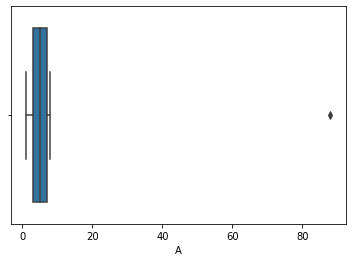

In [ ]:
sns.boxplot(dataset["A"])

In [ ]:
Q1=dataset["A"].quantile(.25)
Q3=dataset["A"].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataset=dataset[(dataset.A>lower_limit) & (dataset.A<upper_limit)]
dataset

,A,B
0,1,12
1,2,6
2,3,15
3,4,23
4,5,29
5,6,34
6,7,39
7,8,547


In [ ]:
Q1=dataset["B"].quantile(.25)
Q3=dataset["B"].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataset=dataset[(dataset.B>lower_limit) & (dataset.B<upper_limit)]
dataset

,A,B
0,1,12
1,2,6
2,3,15
3,4,23
4,5,29
5,6,34
6,7,39


**2. Using Z-score function**

Z-score is a statistical measure that tells you how far a data point is from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.
Z-score is a parametric measure and it takes two parameters — mean and standard deviation.
 
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

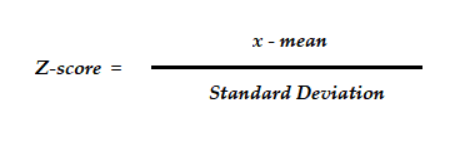

A normal distribution is shown below and it is estimated that

68% of the data points lie between +/- 1 standard deviation.

95% of the data points lie between +/- 2 standard deviation

99.7% of the data points lie between +/- 3 standard deviation



In [ ]:
mean = np.mean(dataset2["A"])
sd = np.std(dataset2["A"])
threshold = 2
outliers = []
for i in dataset2["A"]:
   z = (i-mean)/sd 
   if abs(z) > threshold:  
       outliers.append(i) 


In [ ]:
outliers

[88]

**using scipy library**

In [ ]:
log_price=np.log1p(dataset2)
 
from scipy import stats
 
z_scores=np.abs(stats.zscore(log_price))
z_scores<2

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [False,  True]])

# **Scaling Techniques**

It is extremely important to rescale the variables so that they have a comparable scale. 
There are two common ways of rescaling 
1. Normalisation (min-max scaling)  —> Between 0 to 1

Formula=(x-min(x))/(max(x) - min(x))
 

 
 
2. Standardisation (mean-o, sigma-1)  —> Based on normal standard distribution.


Formula=(x-u)/variance



In [ ]:
data

,A,B
0,1.0,0.10
1,2.0,7.00
2,4.0,0.50
3,6.0,4.15
4,6.5,7.80
5,7.0,6.60
6,3.0,3.70
7,4.5,0.80
8,6.0,0.51
9,33.0,0.22


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
ans=scaling.fit_transform(data)
ans=pd.DataFrame(ans)
ans

,0,1
0,0.000000,0.000000
1,0.031250,0.896104
2,0.093750,0.051948
3,0.156250,0.525974
4,0.171875,1.000000
5,0.187500,0.844156
6,0.062500,0.467532
7,0.109375,0.090909
8,0.156250,0.053247
9,1.000000,0.015584


In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
ans=scaling.fit_transform(data)
ans=pd.DataFrame(ans)
ans

,0,1
0,-0.718138,-1.029679
1,-0.604148,1.308960
2,-0.376168,-0.894106
3,-0.148187,0.343000
4,-0.091192,1.580107
5,-0.034197,1.173387
6,-0.490158,0.190481
7,-0.319173,-0.792426
8,-0.148187,-0.890717
9,2.929548,-0.989007


**Scaling must** —--> KNN , K mean clustering, linear regression , All Deep learning and artificial neural network.
 
**Scaling not required** —---> Decision tree , random forest , Bagging boosting 
 
**Note** : Standardisation is better than normalisation (Except deep learning)


# **Encoding Techniques**

TYPES OF ENCODING


1. Nominal   — (OHE , OHE with many categories , Mean guided encoding)


2. Ordinal  —   (Label Encoding , Target Guided ordinal encoding , Frequency , Mean encoding)


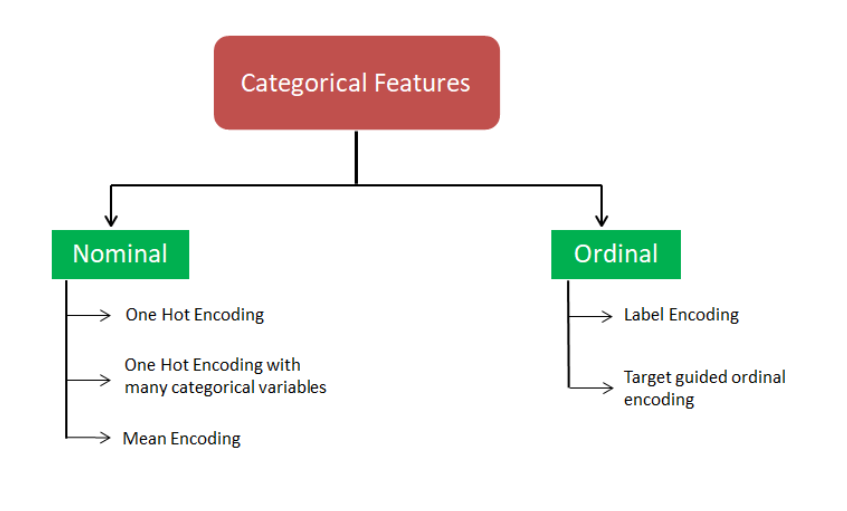

**1. One hot encoding :**

In [ ]:
df=df[["Anewvar","Bnewvar"]]
df2=df.copy()

In [ ]:
d=pd.get_dummies(df,drop_first=True)
d

,Anewvar_p,Anewvar_q,Bnewvar_r,Bnewvar_s
0,1,0,1,0
1,0,1,0,0
2,0,0,0,0
3,1,0,0,1
4,1,0,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
pd.DataFrame(enc.fit_transform(df).toarray(),columns=enc.get_feature_names_out())


,Anewvar_Missing,Anewvar_p,Anewvar_q,Bnewvar_Missing,Bnewvar_r,Bnewvar_s
0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0


**2. OHE with many categories**

In [ ]:
for col in df2.columns:
  print(col, ': ', len(df2[col].unique()))


Anewvar :  3
Bnewvar :  3


What can we do instead?

The authors limit one hot encoding to the 10 most frequent labels of the
variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.


In [ ]:
df2.Anewvar	.value_counts().sort_values(ascending=False).head()


p          3
q          1
Missing    1
Name: Anewvar, dtype: int64

In [ ]:
top_2 = [x for x in df2.Anewvar.value_counts().sort_values(ascending=False).head(2).index]
top_2

['p', 'q']

In [ ]:
for label in top_2:
  df2[label] = np.where(df2['Anewvar']==label, 1, 0)


In [ ]:
df2

,Anewvar,Bnewvar,p,q
0,p,r,1,0
1,q,Missing,0,1
2,Missing,Missing,0,0
3,p,s,1,0
4,p,r,1,0


**One Hot encoding of top variable**s

**Advantages**


Straightforward to implement

Does not require hrs of variable exploration

Does not expand massively the feature space (number of columns in the dataset)


**Disadvantages**


Does not add any information that may make the variable more predictive

Does not keep the information of the ignored labels

Because it is not unusual that categorical variables have a few dominating categories and the remaining labels add mostly noise, this is a quite simple and straightforward approach that may be useful on many occasions.


**3. Mean Encoding**

First Count frequency of each label then, the ratio of total number of times which are in favour and total number of times is the value which get replaced by that label.

In [ ]:
data={'SubjectName':['s1','s2','s3','s1','s4','s3','s2','s1','s2','s4','s1'], 'Target':[1,0,1,1,1,0,0,1,1,1,0]} 
data2=data.copy()

df = pd.DataFrame(data)

df

# Mean_encoded_subject=df.groupby(['SubjectName'])['Target'].mean().to_dict()

# df['SubjectName'] =  df['SubjectName'].map(Mean_encoded_subject) print(df)


,SubjectName,Target
0,s1,1
1,s2,0
2,s3,1
3,s1,1
4,s4,1
5,s3,0
6,s2,0
7,s1,1
8,s2,1
9,s4,1


In [ ]:
df.groupby(['SubjectName'])['Target'].count()

SubjectName
s1    4
s2    3
s3    2
s4    2
Name: Target, dtype: int64

In [ ]:
df.groupby(['SubjectName'])['Target'].mean()

SubjectName
s1    0.750000
s2    0.333333
s3    0.500000
s4    1.000000
Name: Target, dtype: float64

In [ ]:
Mean_encoded_subject=df.groupby(['SubjectName'])['Target'].mean().to_dict()
Mean_encoded_subject

{'s1': 0.75, 's2': 0.3333333333333333, 's3': 0.5, 's4': 1.0}

In [ ]:
df['SubjectName'] =  df['SubjectName'].map(Mean_encoded_subject) 
df

,SubjectName,Target
0,0.750000,1
1,0.333333,0
2,0.500000,1
3,0.750000,1
4,1.000000,1
5,0.500000,0
6,0.333333,0
7,0.750000,1
8,0.333333,1
9,1.000000,1


**4. Target Guided ordinal encoding**

In this technique we will take help of our target variable to encode the categorical data
 
Step 1: sort the cities based upon the corresponding salary. Now to do this we will take the mean of all the salaries of that particular city.

Step 2: Based upon the mean of the salary  the descending order of the city is :
kolkata>mumbai>delhi>pune

step3: Based upon this order we will rank the cities.



**5. Frequency Labelling**

Replace each label by its  Frequency.

**6. Label encoder**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(data2["SubjectName"])

array([0, 1, 2, 0, 3, 2, 1, 0, 1, 3, 0])